In [1]:
import os
import ast
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import numpy as np
import re
import statsmodels.api as sm


def build_df(filename):
    with open("optuna_logs/"+filename, "r") as file:
        content = file.read()
    records = []
    for line in content.split("\n"):
        if not line.startswith("Current value: "):
            continue
        params = ast.literal_eval(line[line.index("Current params: ")+16:])
        loss = float(line.split(",")[0].removeprefix("Current value: "))
        record = {'LOSS': loss}
        record.update(params)
        records.append(record)
    df = pd.DataFrame(records)
    df = df.sort_values("LOSS").reset_index(drop=True)
    return df


builder = []
for filename in os.listdir("optuna_logs"):
    _, architecture, target_domain, _, pretrained, _, augmented, _, _ =filename.replace("art_painting", "art-painting").split("_")
    target_domain = target_domain.replace("-", "_")
    df = build_df(filename)
    df["architecture"] = architecture
    df["target_domain"] = target_domain
    df["pretrained"] = True if pretrained == "True" else False
    df["augmented"] = True if augmented == "True" else False
    builder.append(df)
    
df = pd.concat(builder)

LEARNING_RATE


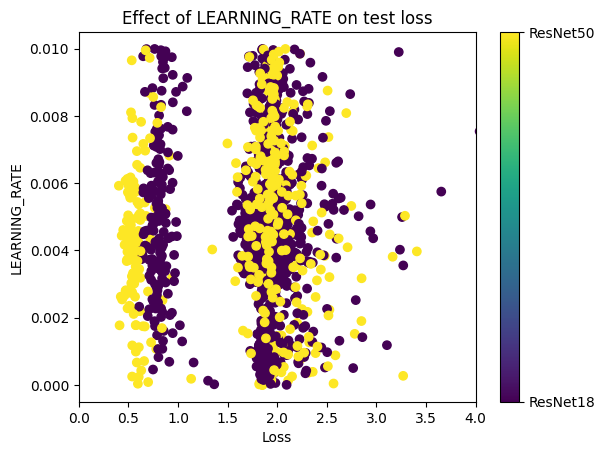

BETA_1


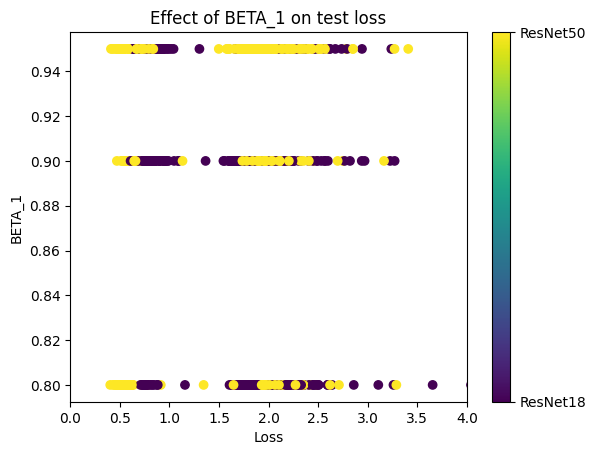

BETA_2


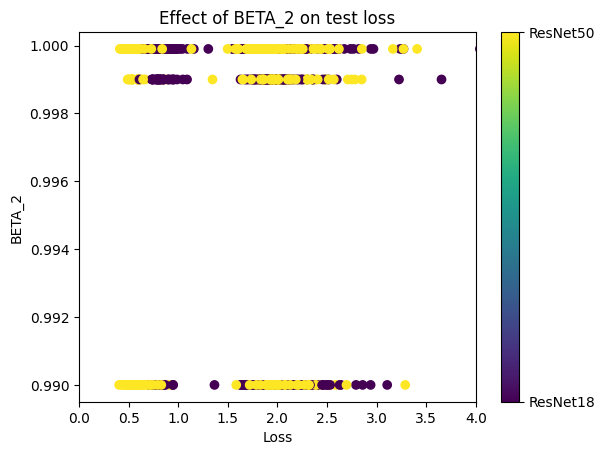

WEIGHT_DECAY


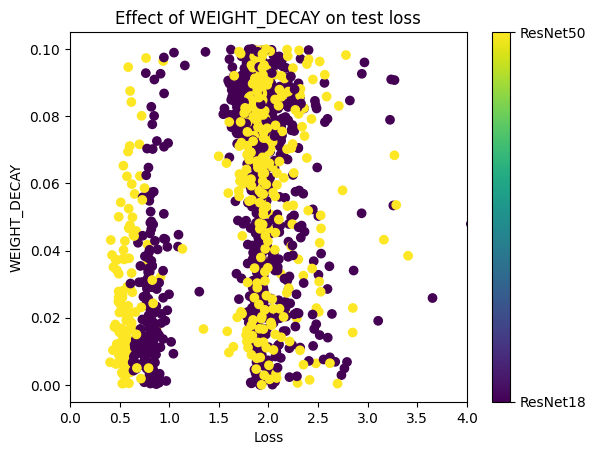

OPTIMIZER


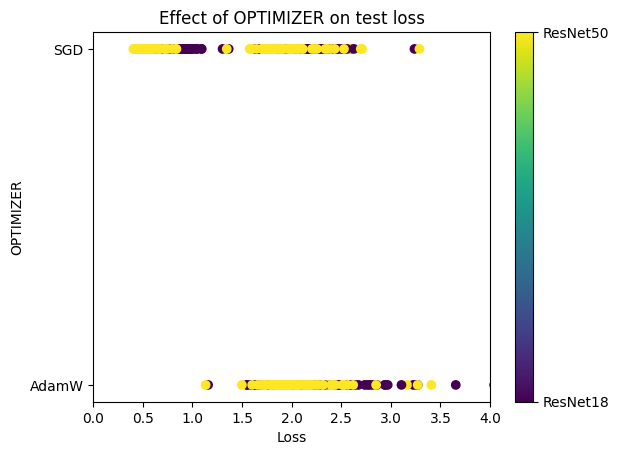

SCHEDULER


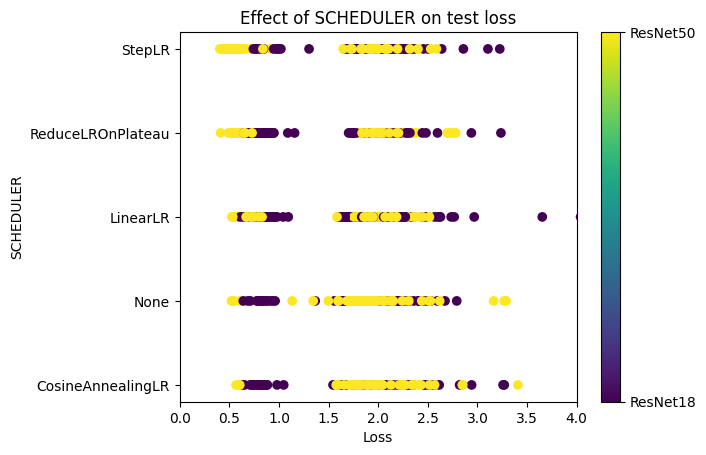

MOMENTUM


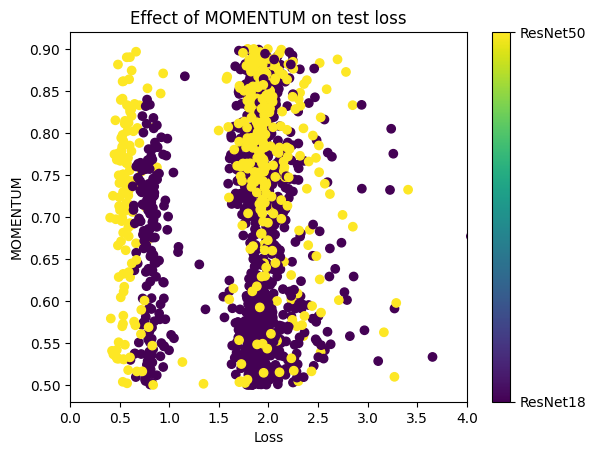

DAMPENING


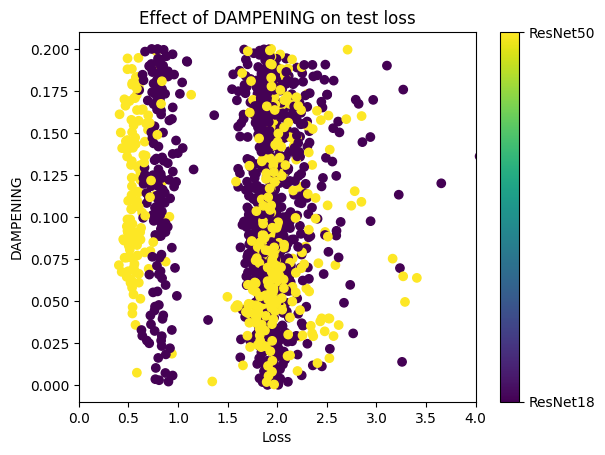

GAMMA


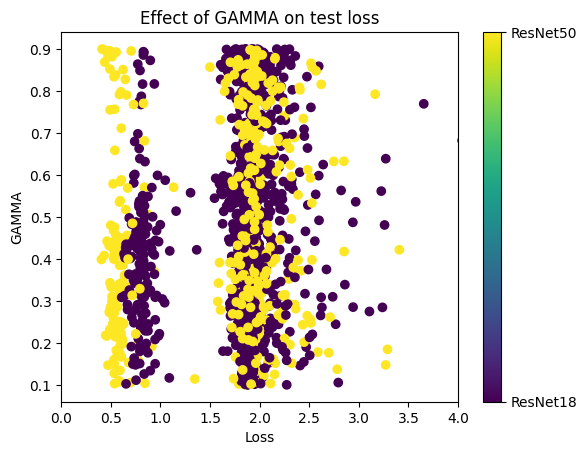

STEP_SIZE


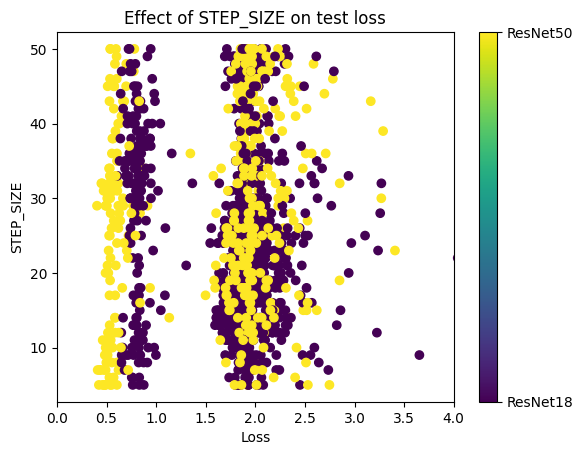

USE_AUGMIX


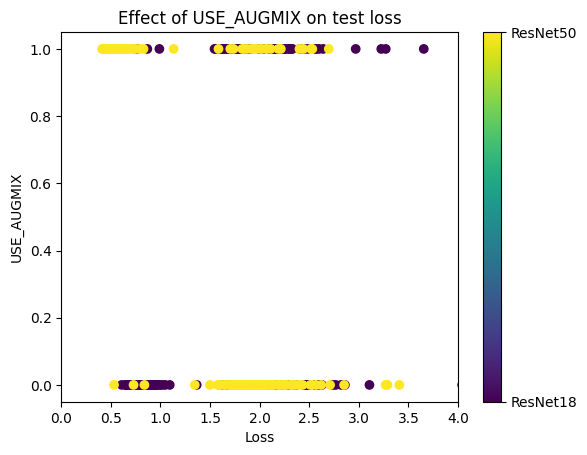

SEVERITY


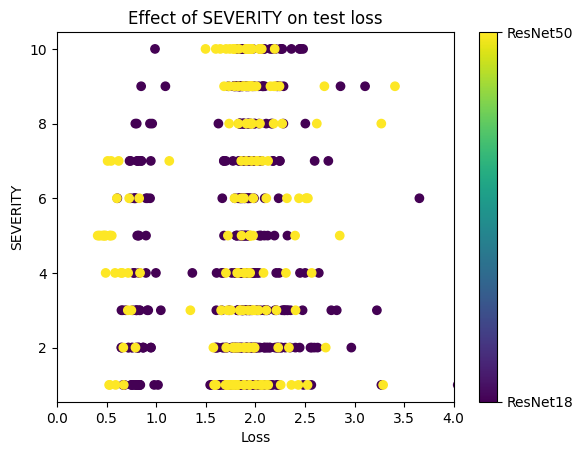

MIXTURE_WIDTH


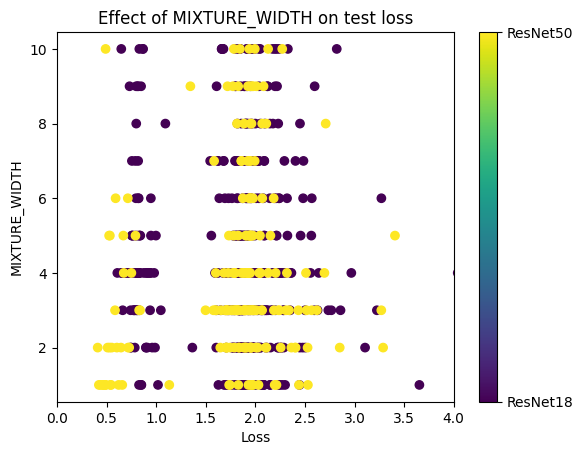

CHAIN_DEPTH


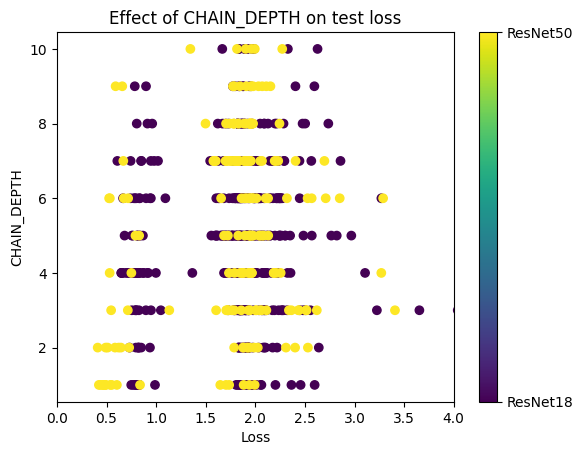

ALPHA


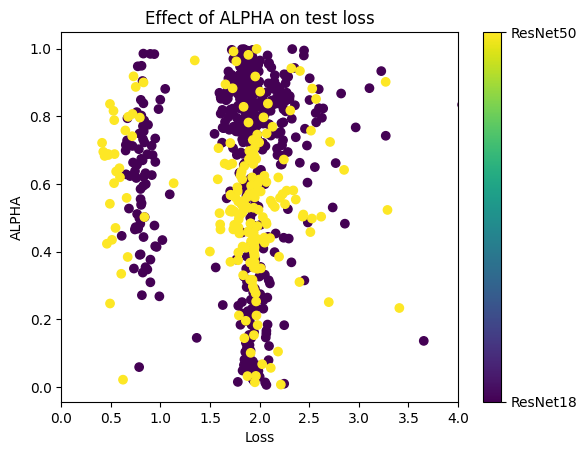

ALL_OPS


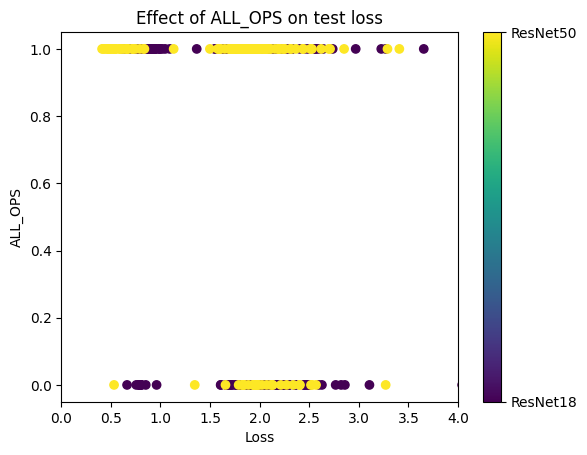

INTERPOLATION


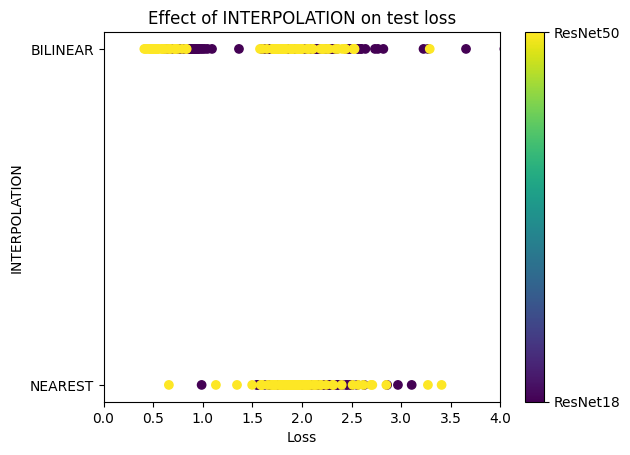

USE_FOURIER


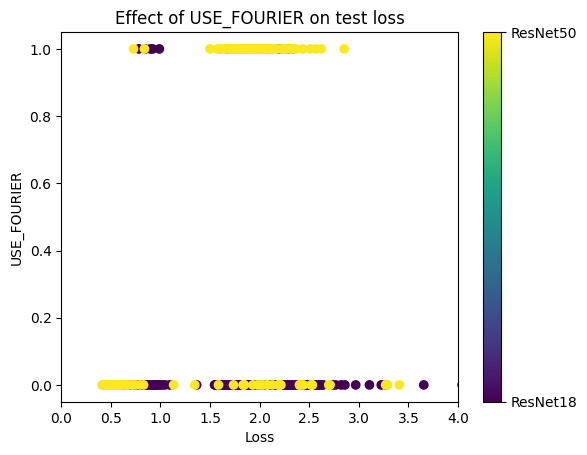

SQUARE_SIZE_SINGLE_SIDE


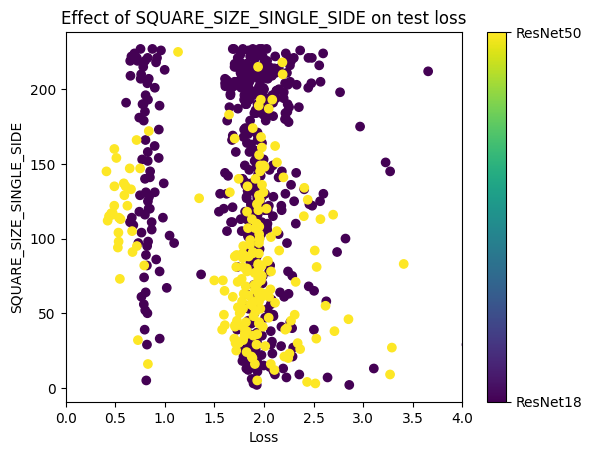

ETA


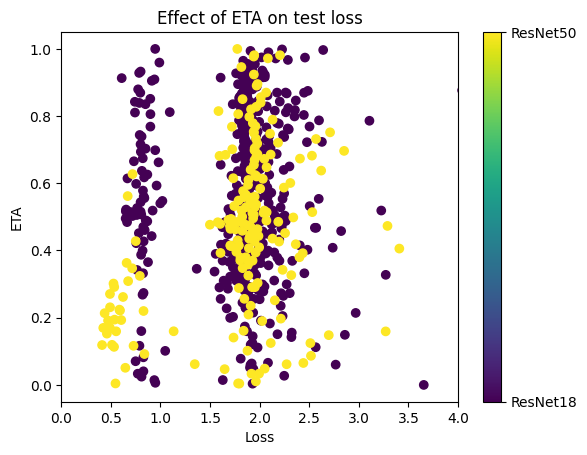

USE_JIGSAW


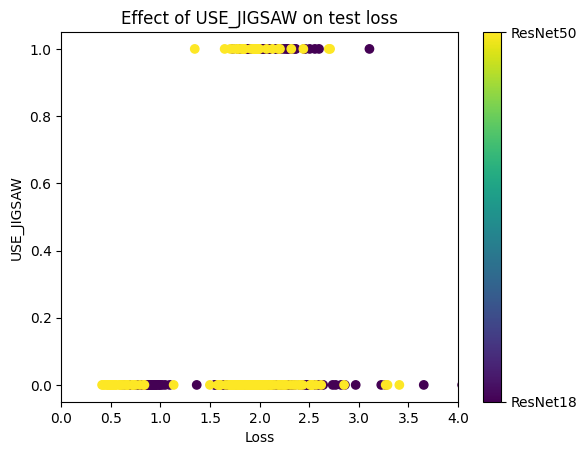

MIN_GRID_SIZE


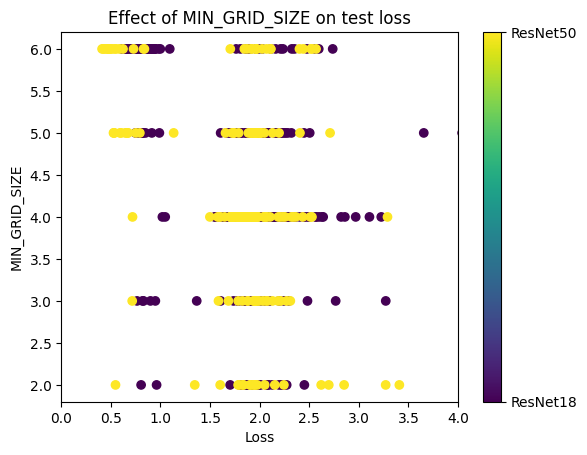

MAX_GRID_SIZE


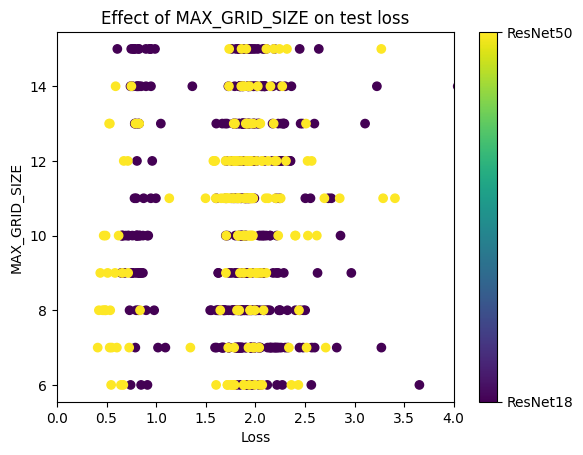

USE_DLOW


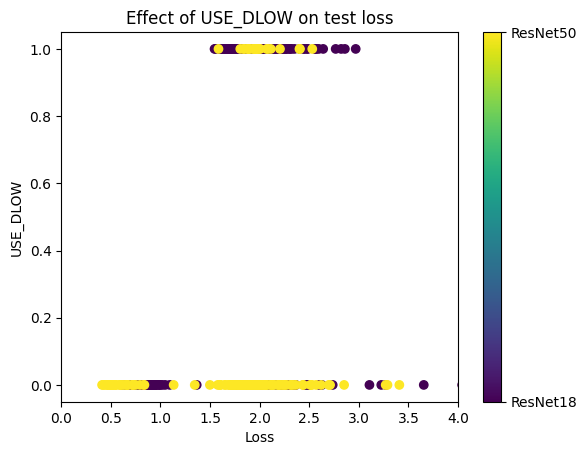

TRANSFORMATIONS_ORDER


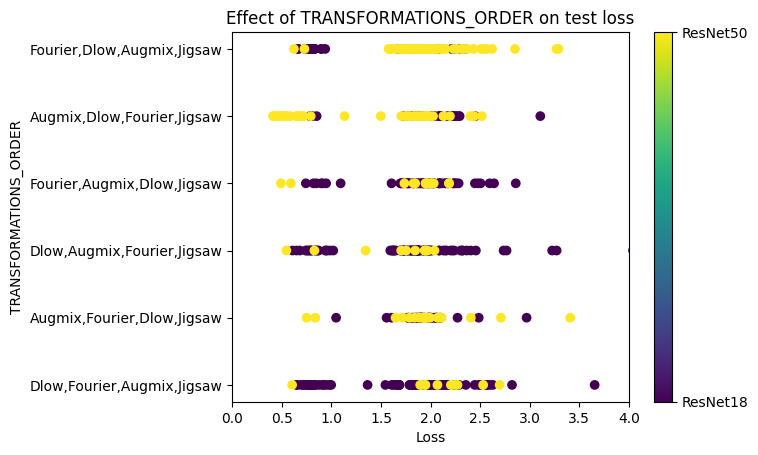

target_domain


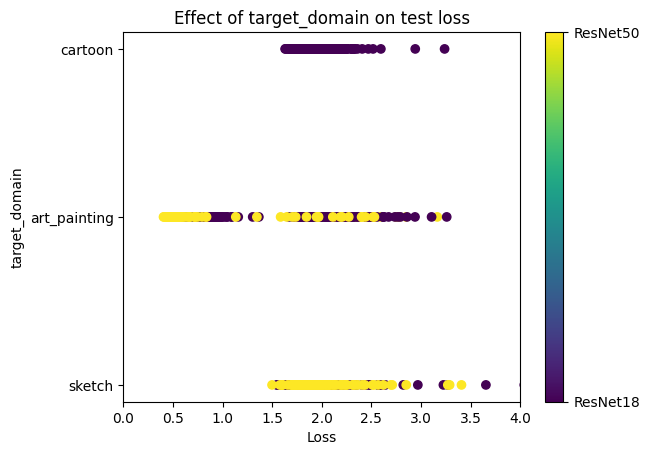

pretrained


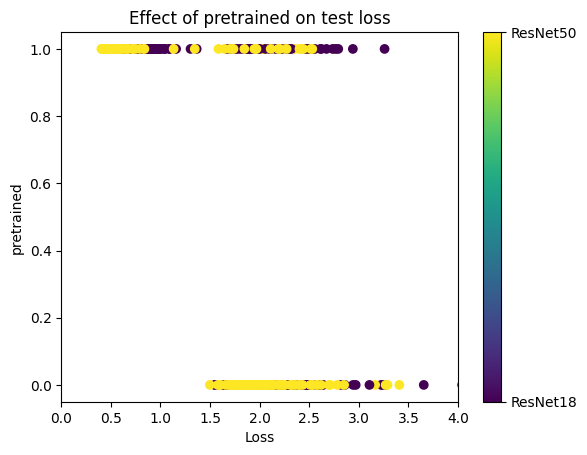

augmented


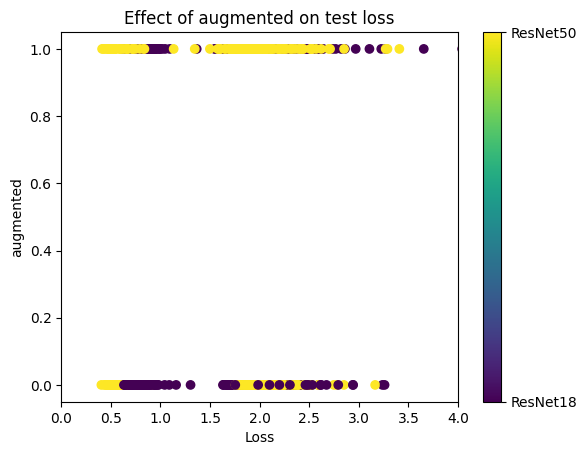

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

var_color = "architecture"

for param in df.columns:
    if param != 'LOSS' and param != var_color:  # Avoid plotting LOSS against itself and the color column
        plt.figure()
        
        sample = df[~df[param].isna()]

        # Get unique values from the color variable
        unique_values = sample[var_color].unique()

        # Create a color map based on unique values
        colors = plt.get_cmap('viridis', len(unique_values))  # Adjust colormap length

        # Factorize the categorical variable
        color_indices = pd.factorize(sample[var_color])[0]  # Converts categories to integers

        # Create scatter plot
        plt.scatter(sample["LOSS"].values, sample[param].values, c=color_indices, cmap='viridis')

        plt.xlim(0, 4)
        plt.xlabel("Loss")
        plt.ylabel(param)
        plt.title(f"Effect of {param} on test loss")

        # Create a colorbar with the unique values as labels
        cbar = plt.colorbar(ticks=range(len(unique_values)))
        cbar.ax.set_yticklabels(unique_values)  # Set colorbar labels to the unique values in var_color
        print(param)
        plt.show()


In [3]:
df.columns

Index(['LOSS', 'LEARNING_RATE', 'BETA_1', 'BETA_2', 'WEIGHT_DECAY',
       'OPTIMIZER', 'SCHEDULER', 'MOMENTUM', 'DAMPENING', 'GAMMA', 'STEP_SIZE',
       'USE_AUGMIX', 'SEVERITY', 'MIXTURE_WIDTH', 'CHAIN_DEPTH', 'ALPHA',
       'ALL_OPS', 'INTERPOLATION', 'USE_FOURIER', 'SQUARE_SIZE_SINGLE_SIDE',
       'ETA', 'USE_JIGSAW', 'MIN_GRID_SIZE', 'MAX_GRID_SIZE', 'USE_DLOW',
       'TRANSFORMATIONS_ORDER', 'architecture', 'target_domain', 'pretrained',
       'augmented'],
      dtype='object')

In [4]:
sample = df[df["architecture"]=="ResNet50"]

data = sample[["USE_AUGMIX", "USE_JIGSAW", "USE_FOURIER", "USE_DLOW", "MIN_GRID_SIZE", "MAX_GRID_SIZE", "pretrained"]]

y = sample["LOSS"][~data.isna().any(axis=1)]

data = data.dropna()
data["USE_AUGMIX"] = data["USE_AUGMIX"].astype(int)
data["USE_JIGSAW"] = data["USE_JIGSAW"].astype(int)
data["USE_FOURIER"] = data["USE_FOURIER"].astype(int)
data["USE_DLOW"] = data["USE_DLOW"].astype(int)
data["pretrained"] = data["pretrained"].astype(int)


X = sm.add_constant(data)


# Fitting the linear regression model
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LOSS   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     30.02
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           2.01e-27
Time:                        10:44:52   Log-Likelihood:                -97.634
No. Observations:                 192   AIC:                             211.3
Df Residuals:                     184   BIC:                             237.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7003      0.197      8.623      0.000       1.311       2.089
USE_AUGMIX       -0.1427      0.095     -1.508      0.133      -0.329       0.044
USE_JIGSAW        0.2857      0.083      3.429      0.001       0.121       0.450
USE_FOURIER      -0.0672      0.089     -0.753      0.452      -0.243       0.109
USE_DLOW          0.2942      0.091      3.240      0.001       0.115       0.473
MIN_GRID_SIZE    -0.0253      0.029     -0.863      0.389      -0.083       0.033
MAX_GRID_SIZE     0.0363      0.013      2.880      0.004       0.011       0.061
pretrained       -0.8004      0.110     -7.294      0.000      -1.017      -0.584
==============================================================================
Omnibus:                       62.733   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.082
Skew:                           1.509   Prob(JB):                     1.04e-30
Kurtosis:                       5.854   Cond. No.                         77.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""